# Data Exploration and Visualization (Getting to know your data)

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [5]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [6]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

All attributes are numerical, except the ocean_proximity field.

In [8]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [9]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

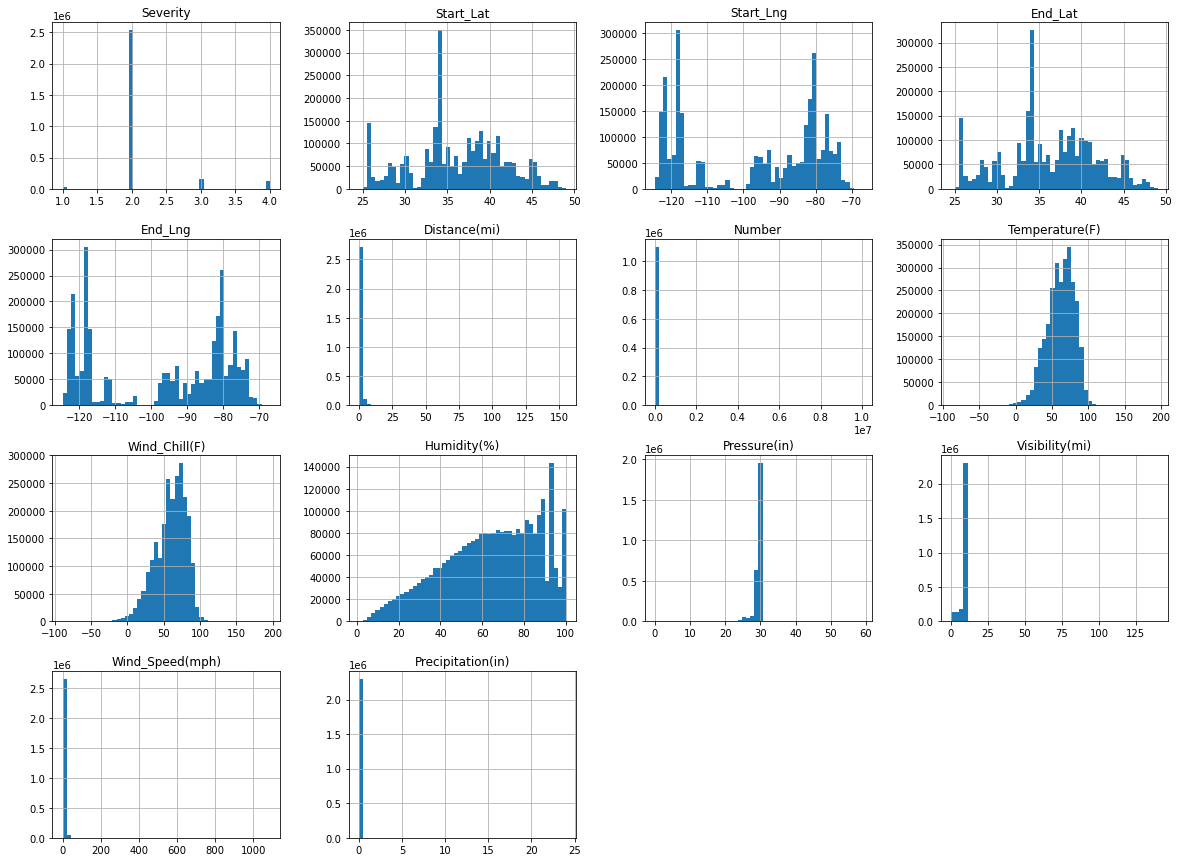

In [15]:
#To plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

In [16]:
cities = data.City.unique()
len(cities)

11682

In [10]:
numOfAccidentsPerCity = data.City.value_counts()
numOfAccidentsPerCity.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [11]:
Weatherconditions = data.Weather_Condition.value_counts().reset_index()
Weatherconditions.columns = ['Weather_Condition','Accidents']
Weatherconditions['Percentage'] = round(Weatherconditions['Accidents'] * 100 /Weatherconditions['Accidents'].sum() , 2)
Weatherconditions.head(10)

,Weather_Condition,Accidents,Percentage
0,Fair,1107194,39.90
1,Mostly Cloudy,363959,13.12
2,Cloudy,348767,12.57
3,Partly Cloudy,249939,9.01
4,Clear,173823,6.26
5,Light Rain,128403,4.63
6,Overcast,84882,3.06
7,Scattered Clouds,45132,1.63
8,Light Snow,43752,1.58
9,Fog,41226,1.49


In [12]:
Severitycounts = data.Severity.value_counts().reset_index()
Severitycounts.columns = ['Severity','Accidents']
Severitycounts['Percentage'] = round(Severitycounts['Accidents'] * 100 /Severitycounts['Accidents'].sum() , 2)
Severitycounts.head()

,Severity,Accidents,Percentage
0,2,2532991,89.02
1,3,155105,5.45
2,4,131193,4.61
3,1,26053,0.92


In [19]:
table = data

# Correlations and Visualizations


In [20]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Distance(mi)"].sort_values(ascending=False)

Distance(mi)         1.000000
Severity             0.092140
End_Lat              0.071593
Start_Lat            0.071588
Number               0.067331
Start_Lng            0.039861
End_Lng              0.039830
Humidity(%)          0.026860
Junction             0.022442
Wind_Speed(mph)      0.011127
Precipitation(in)    0.003050
Roundabout          -0.002491
Bump                -0.005408
Give_Way            -0.006655
Traffic_Calming     -0.007322
No_Exit             -0.010184
Railway             -0.021462
Stop                -0.027108
Amenity             -0.032717
Visibility(mi)      -0.034001
Temperature(F)      -0.051212
Station             -0.052826
Wind_Chill(F)       -0.060094
Pressure(in)        -0.069115
Crossing            -0.091256
Traffic_Signal      -0.105722
Turning_Loop              NaN
Name: Distance(mi), dtype: float64

In [21]:
numOfAccidentsPerCity = data.City.value_counts()
numOfAccidentsPerCity.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

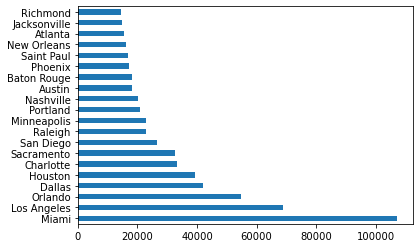

In [22]:
numOfAccidentsPerCity[:20].plot(kind = 'barh')

<AxesSubplot:>

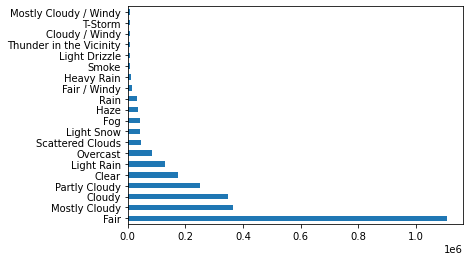

In [23]:
Weathertypes = data.Weather_Condition.value_counts()
Weathertypes[:20].plot(kind = 'barh')

In [24]:
corr_matrix["Severity"].sort_values(ascending=False)
# Most correlated attributes to Severity

Severity             1.000000
End_Lng              0.114064
Start_Lng            0.114063
Distance(mi)         0.092140
End_Lat              0.089209
Start_Lat            0.089207
Wind_Speed(mph)      0.048382
Junction             0.045928
Pressure(in)         0.043883
Humidity(%)          0.037802
Precipitation(in)    0.013845
Give_Way             0.008141
Visibility(mi)       0.007371
Number              -0.000689
Roundabout          -0.000773
Railway             -0.001747
No_Exit             -0.002359
Stop                -0.002536
Traffic_Calming     -0.003009
Bump                -0.003739
Amenity             -0.003940
Traffic_Signal      -0.012798
Station             -0.018017
Crossing            -0.035382
Temperature(F)      -0.045335
Wind_Chill(F)       -0.097459
Turning_Loop              NaN
Name: Severity, dtype: float64

array([[<AxesSubplot:xlabel='Severity', ylabel='Severity'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Severity'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Severity'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Distance(mi)'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Wind_Chill(F)'>]],
      dtype=object)

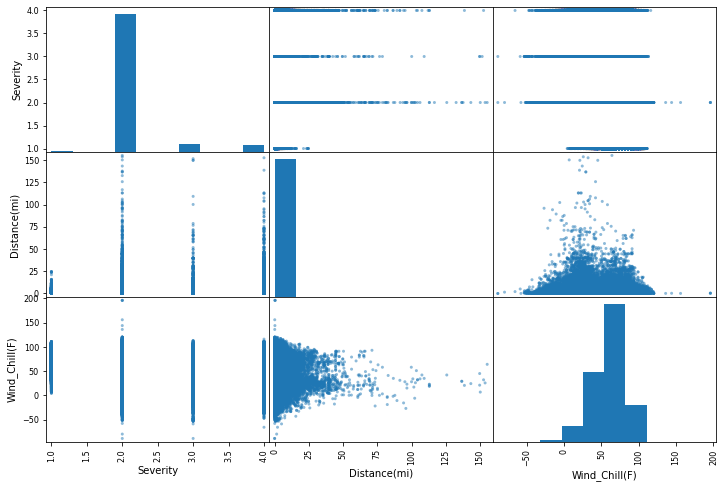

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["Severity","Distance(mi)","Wind_Chill(F)"]
scatter_matrix(data[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


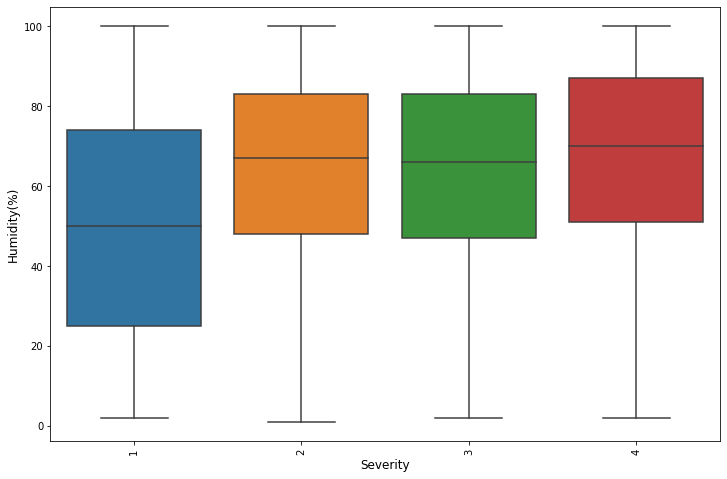

In [26]:
#Boxplot to correlate Humidity and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Humidity(%)", data=data)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


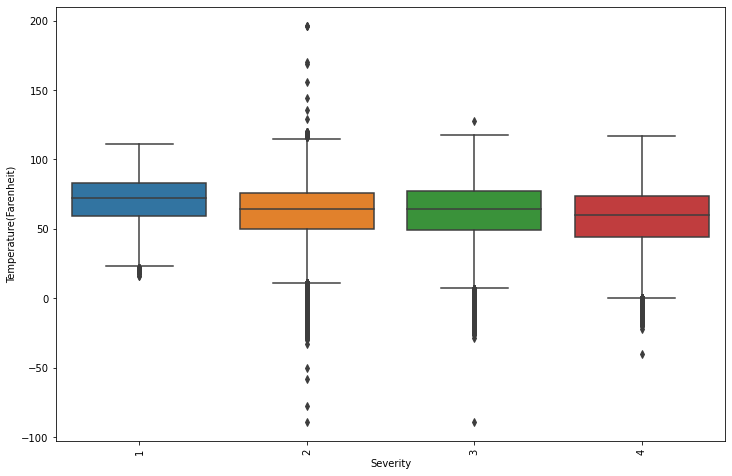

In [27]:
#Boxplot to correlate Temp and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Temperature(F)", data=data)
plt.ylabel('Temperature(Farenheit)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

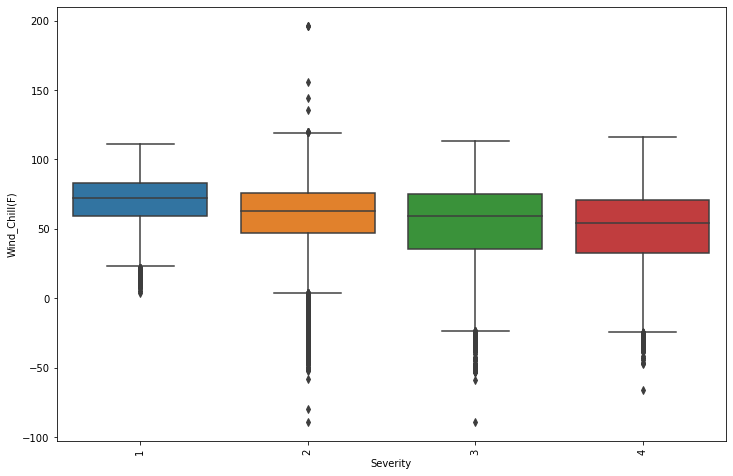

In [28]:
#Boxplot to correlate WindChill and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=data)
plt.ylabel('Wind_Chill(F)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

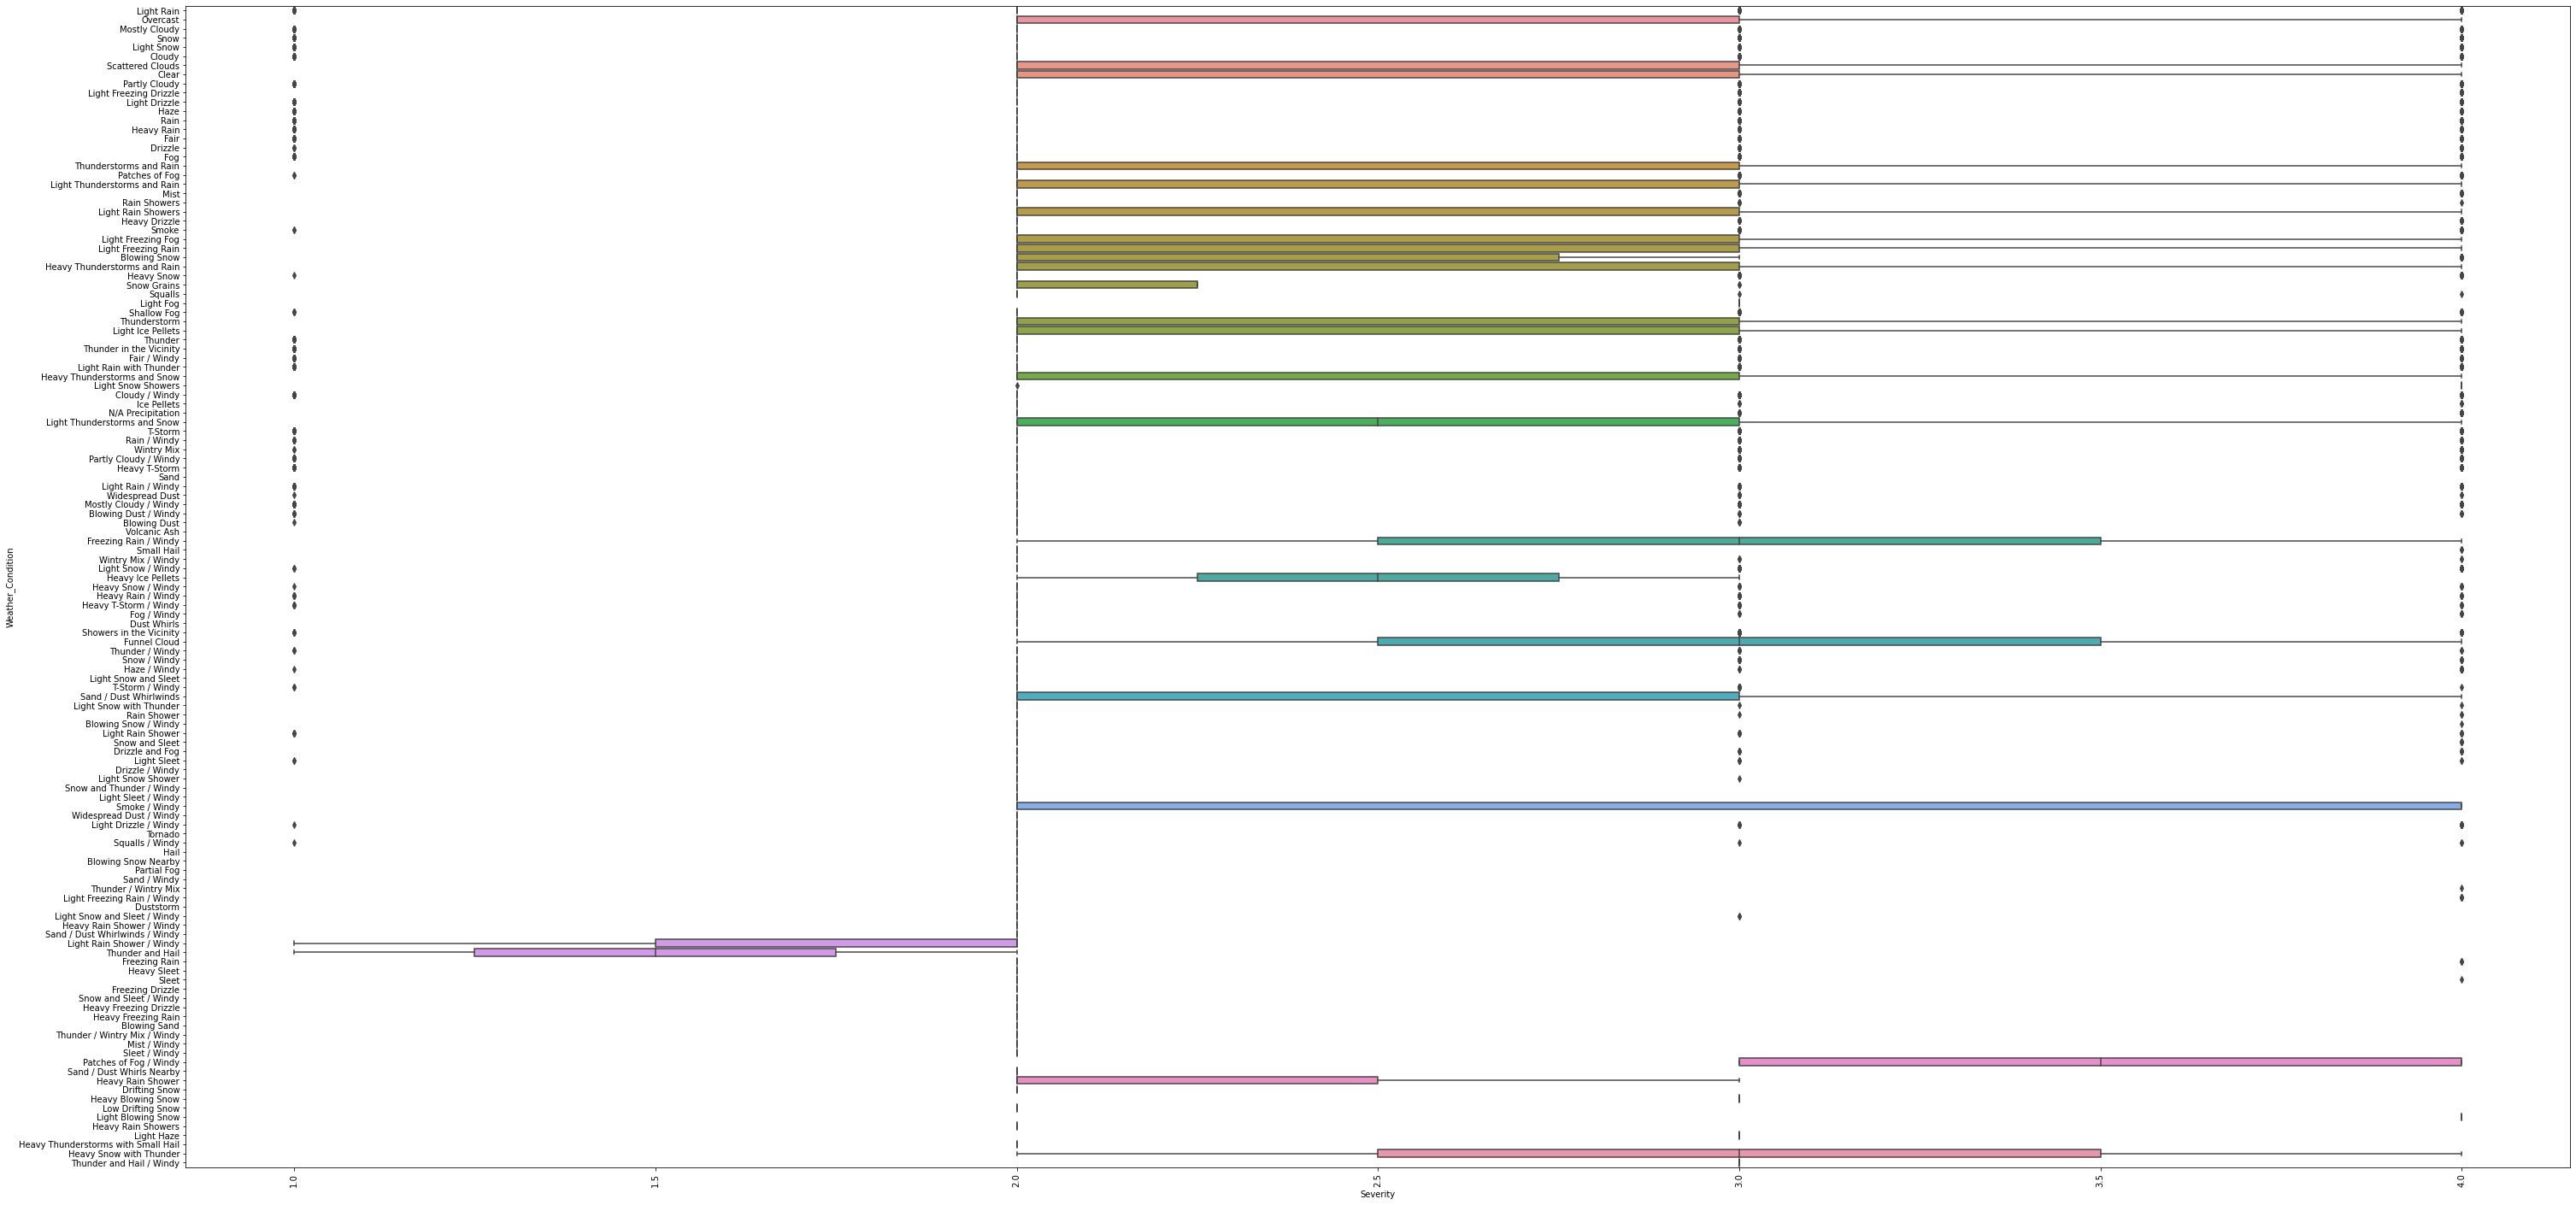

In [29]:
#Boxplot to correlate WeatherCondition and Severity
plt.figure(figsize=(50,25))
sns.boxplot(x="Severity", y="Weather_Condition", data=data)
plt.ylabel('Weather_Condition', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

# Analyzing most correlating features (Lab3, week4)

In [13]:
#print(data["Severity"][:50])
#2 dataset 1: top features for each class
testData1 = data.copy()
testData2 = data.copy()
testData3 = data.copy()
testData4 = data.copy()


#print("After changing 2 to 99")
#for index, row in testData.iloc[:50].iterrows():
#    if row["Severity"] == 99:
#        #print(row["Severity"])
#        testData.at[index,"Severity"] = 2
#print(testData["Severity"][:50])

#Most correlating features for each label
#label 0, keep 0 as 0 and change all other values to null
print("After changing 2,3,4 to 99")

testData1['Severity'] = testData1['Severity'].replace([2],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

testData2['Severity'] = testData2['Severity'].replace([1],0)
testData2['Severity'] = testData2['Severity'].replace([3],0)
testData2['Severity'] = testData2['Severity'].replace([4],0)

testData3['Severity'] = testData3['Severity'].replace([1],0)
testData3['Severity'] = testData3['Severity'].replace([4],0)
testData3['Severity'] = testData3['Severity'].replace([2],0)

testData4['Severity'] = testData4['Severity'].replace([1],0)
testData4['Severity'] = testData4['Severity'].replace([3],0)
testData4['Severity'] = testData4['Severity'].replace([2],0)

#for index, row in testData0.iterrows():
#    if row["Severity"] != 0:
#        #print(row["Severity"])
#        #currValue = row["Severity"]
#        #currIndex = index
#        #testData0.at["Severity"] = 99
#        #print("Changed")
#        #print(currValue)
#        testdata0['Severity'] = test['column name'].replace(['old value'],'new value')
print(testData3["Severity"].value_counts())



After changing 2,3,4 to 99
0    2690237
3     155105
Name: Severity, dtype: int64


In [14]:
#Looking for Correlations for different classes of Severity (e.g testData1 for Severity = 1 and so on)
corr_matrix_data1 = testData1.corr()
corr_matrix_data1["Severity"].sort_values(ascending=False)

Severity             1.000000
Traffic_Signal       0.120816
Crossing             0.098200
Wind_Chill(F)        0.055563
Temperature(F)       0.049163
Wind_Speed(mph)      0.017663
Visibility(mi)       0.015361
Railway              0.013699
No_Exit              0.012042
Amenity              0.010831
Station              0.009867
Give_Way             0.006776
Stop                 0.002168
Traffic_Calming      0.001704
Bump                 0.000517
Roundabout           0.000490
Precipitation(in)   -0.001735
Junction            -0.004765
End_Lat             -0.009715
Start_Lat           -0.009717
Number              -0.015495
Start_Lng           -0.021186
End_Lng             -0.021187
Distance(mi)        -0.030796
Pressure(in)        -0.042321
Humidity(%)         -0.060888
Turning_Loop              NaN
Name: Severity, dtype: float64

In [15]:

corr_matrix_data2 = testData2.corr()
corr_matrix_data2["Severity"].sort_values(ascending=False)

Severity             1.000000
Wind_Chill(F)        0.057926
Station              0.013222
Temperature(F)       0.011472
Number               0.009230
Stop                 0.007029
Bump                 0.003507
Traffic_Calming      0.002106
Roundabout           0.000770
Amenity              0.000508
Humidity(%)         -0.000087
No_Exit             -0.003870
Railway             -0.005906
Crossing            -0.010319
Give_Way            -0.010517
Precipitation(in)   -0.016908
Visibility(mi)      -0.020936
Pressure(in)        -0.022967
Traffic_Signal      -0.049457
Distance(mi)        -0.051789
Junction            -0.061190
Wind_Speed(mph)     -0.069599
Start_Lat           -0.082253
End_Lat             -0.082255
Start_Lng           -0.096864
End_Lng             -0.096864
Turning_Loop              NaN
Name: Severity, dtype: float64

In [16]:
corr_matrix_data3 = testData3.corr()
corr_matrix_data3["Severity"].sort_values(ascending=False)

Severity             1.000000
Junction             0.077665
Wind_Speed(mph)      0.067089
Start_Lng            0.052905
End_Lng              0.052904
End_Lat              0.050645
Start_Lat            0.050644
Pressure(in)         0.024320
Visibility(mi)       0.022633
Precipitation(in)    0.021727
Traffic_Signal       0.011123
Give_Way             0.003269
Railway              0.002707
Temperature(F)       0.001644
No_Exit              0.000476
Roundabout          -0.001108
Number              -0.001293
Traffic_Calming     -0.001599
Humidity(%)         -0.002263
Bump                -0.002424
Amenity             -0.006726
Station             -0.010841
Distance(mi)        -0.012905
Stop                -0.016740
Crossing            -0.020573
Wind_Chill(F)       -0.045307
Turning_Loop              NaN
Name: Severity, dtype: float64

In [17]:
corr_matrix_data4 = testData4.corr()
corr_matrix_data4["Severity"].sort_values(ascending=False)

Severity             1.000000
Distance(mi)         0.105154
End_Lng              0.096740
Start_Lng            0.096739
End_Lat              0.072199
Start_Lat            0.072197
Humidity(%)          0.030482
Pressure(in)         0.027250
Wind_Speed(mph)      0.023178
Junction             0.009301
Give_Way             0.009061
Traffic_Signal       0.006809
Stop                 0.006659
Precipitation(in)    0.004258
Amenity              0.001604
Roundabout          -0.000171
No_Exit             -0.000215
Visibility(mi)      -0.000347
Railway             -0.000348
Traffic_Calming     -0.002183
Bump                -0.002838
Number              -0.003758
Crossing            -0.006948
Station             -0.012455
Temperature(F)      -0.041443
Wind_Chill(F)       -0.073010
Turning_Loop              NaN
Name: Severity, dtype: float64

In [18]:
#Use top 2 features for each of the Classes (5 total features) drop the rest
#1-WindChill, Humidity
#2-WindChill, WindSpeed
#3-WindChill, WindSpeed
#4-Distance, Temperature
df1 = data.filter(['Severity', 'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)'])
df1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi)
0,3,36.1,42.1,58.0,10.4,3.230
1,2,NaN,36.9,91.0,NaN,0.747
2,2,NaN,36.0,97.0,NaN,0.055
3,2,NaN,39.0,55.0,NaN,0.123
4,3,29.8,37.0,93.0,10.4,0.500
...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543
2845338,2,70.0,70.0,73.0,6.0,0.338
2845339,2,73.0,73.0,64.0,10.0,0.561
2845340,2,71.0,71.0,81.0,8.0,0.772


In [19]:
df1 = df1.dropna()
df1 = df1.reset_index(drop = True)
df1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi)
0,3,36.1,42.1,58.0,10.4,3.230
1,3,29.8,37.0,93.0,10.4,0.500
2,2,29.2,35.6,100.0,8.1,1.427
3,2,30.0,33.1,92.0,3.5,0.521
4,2,31.8,39.0,70.0,11.5,0.491
...,...,...,...,...,...,...
2372349,2,86.0,86.0,40.0,13.0,0.543
2372350,2,70.0,70.0,73.0,6.0,0.338
2372351,2,73.0,73.0,64.0,10.0,0.561
2372352,2,71.0,71.0,81.0,8.0,0.772


In [6]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [7]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [34]:
#Correlations for dataframe1
corr_matrix = df1.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Severity"].sort_values(ascending=False)

Severity           1.000000
Distance(mi)       0.075081
Wind_Speed(mph)    0.037724
Humidity(%)        0.037265
Temperature(F)    -0.089903
Wind_Chill(F)     -0.097531
Name: Severity, dtype: float64

In [35]:
#Correlations for dataframe2
corr_matrix = df2.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Severity"].sort_values(ascending=False)

Severity           1.000000
Distance(mi)       0.074843
Wind_Speed(mph)    0.037440
Humidity(%)        0.037375
Humidity(%)        0.037375
Visibility(mi)    -0.006102
Pressure(in)      -0.011482
Temperature(F)    -0.089517
Wind_Chill(F)     -0.097101
Name: Severity, dtype: float64

# K Nearest Neighbors

In [22]:
(df2['Severity'].value_counts()) / len(df2) * 100

2    92.218651
3     3.424212
4     3.276642
1     1.080495
Name: Severity, dtype: float64

In [23]:
 df2new = df2.groupby('Severity', group_keys=False).apply(lambda x: x.sample(25539))
df2new.head(90000)

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
1974174,1,51.0,51.0,89.0,8.0,0.000,29.25,4.0,89.0
1898004,1,67.0,67.0,40.0,5.0,0.000,27.05,10.0,40.0
1841005,1,85.0,85.0,10.0,7.0,0.000,28.66,10.0,10.0
1990150,1,54.0,54.0,77.0,20.0,0.000,29.13,10.0,77.0
1848857,1,70.0,70.0,43.0,6.0,0.000,29.69,10.0,43.0
...,...,...,...,...,...,...,...,...,...
923430,4,68.0,68.0,31.0,6.0,0.096,27.73,10.0,31.0
331840,4,70.0,70.0,42.0,15.0,3.124,29.54,10.0,42.0
2160969,4,56.0,56.0,75.0,6.0,0.137,30.10,10.0,75.0
52390,4,80.0,80.0,70.0,9.0,2.436,29.43,10.0,70.0


In [24]:
df2new = df2.groupby('Severity', group_keys=False).apply(lambda x: x.sample(frac=0.6))
# distributing the dataset into two components X and Y
#f1 score, fpr
#roc curves
#stratification
#cross validation
X = df2.iloc[:, 1:13].values.round(decimals=0)
y = df2.iloc[:, 0].values
y
print("Here")
X

Here


array([[ 36.,  42.,  58., ...,  30.,  10.,  58.],
       [ 30.,  37.,  93., ...,  30.,  10.,  93.],
       [ 29.,  36., 100., ...,  30.,  10., 100.],
       ...,
       [ 73.,  73.,  64., ...,  30.,  10.,  64.],
       [ 71.,  71.,  81., ...,  30.,  10.,  81.],
       [ 79.,  79.,  47., ...,  29.,   7.,  47.]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = 0.2, random_state = 0)


In [26]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(y_test)

[2 2 2 ... 2 2 2]


In [27]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
explained_variance
print(X_test)

[[-1.12357776 -0.64048976]
 [-0.64014853  2.15613726]
 [ 0.59731922  0.75870169]
 ...
 [ 2.66944045  1.39478951]
 [-3.6523865   4.3127675 ]
 [ 1.33031082  0.69639871]]


# Calculate Precision, Recall and F measure

# K Nearest Neighbors

In [28]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
## Import the Classifier.
# Fitting K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model. 
knn = KNeighborsClassifier()
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
print(knn.score(X_test, y_test))

0.9186525866883282


In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[   1416   17674      96      17]
 [   2793 1624319    4637    3239]
 [    181   57755    2245     333]
 [    138   55856     492    1538]]
              precision    recall  f1-score   support

           1       0.31      0.07      0.12     19203
           2       0.93      0.99      0.96   1634988
           3       0.30      0.04      0.07     60514
           4       0.30      0.03      0.05     58024

    accuracy                           0.92   1772729
   macro avg       0.46      0.28      0.30   1772729
weighted avg       0.88      0.92      0.89   1772729



# One v All Bayesian Nets

# Multinomial NB

In [44]:
print(X_train)

[[53. 53. 80. ... 29. 10. 80.]
 [27. 27. 80. ... 27. 10. 80.]
 [62. 62. 58. ... 30. 10. 58.]
 ...
 [79. 79. 35. ... 29. 10. 35.]
 [79. 79. 79. ... 30. 10. 79.]
 [53. 53. 41. ... 30. 10. 41.]]


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = MultinomialNB()
model.fit(X_train_scaled, y_train)
model

y_pred = model.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

TP = np.diag(matrix)

FP = matrix.sum(axis=0) - TP

FN = matrix.sum(axis=1) - TP

TN = matrix.sum() - (FP + FN + TP)

print("TP:",TP)

print("Accuracy:",(TP + TN) /(TP + TN + FP + FN))
print("Sensitivity:",(TP) /(TP+FN))
print("Specificity:",(TN) /(TN + FP))

print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[     0   5108      0      0]
 [     0 435943      0      0]
 [     0  16187      0      0]
 [     0  15490      0      0]]
TP: [     0 435943      0      0]
Accuracy: [0.98919463 0.9221857  0.96575832 0.96723274]
Sensitivity: [0. 1. 0. 0.]
Specificity: [1. 0. 1. 1.]
Precision Score :  0.23054642415934745
Recall Score :  0.25
F1 Score :  0.23987945031810193


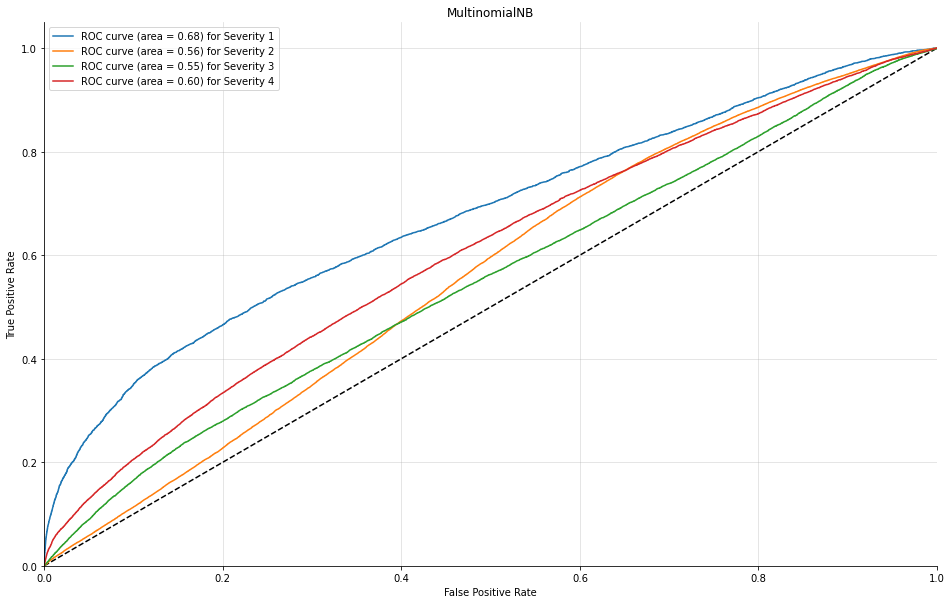

In [41]:

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('MultinomialNB')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for Severity %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model, X_test_scaled, y_test, n_classes=4, figsize=(16, 10))

# Gaussian NB

In [42]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model

y_pred = model.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?|
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))
#f1 score, fpr

[[  1030   3972     69     37]
 [ 10243 407368  11160   7172]
 [   442  14437   1034    274]
 [   279  13562    647   1002]]
Accuracy: 0.8682244335008715
Precision Score :  0.3028223214993297
Recall Score :  0.31616555871433527
F1 Score :  0.30148507551906345


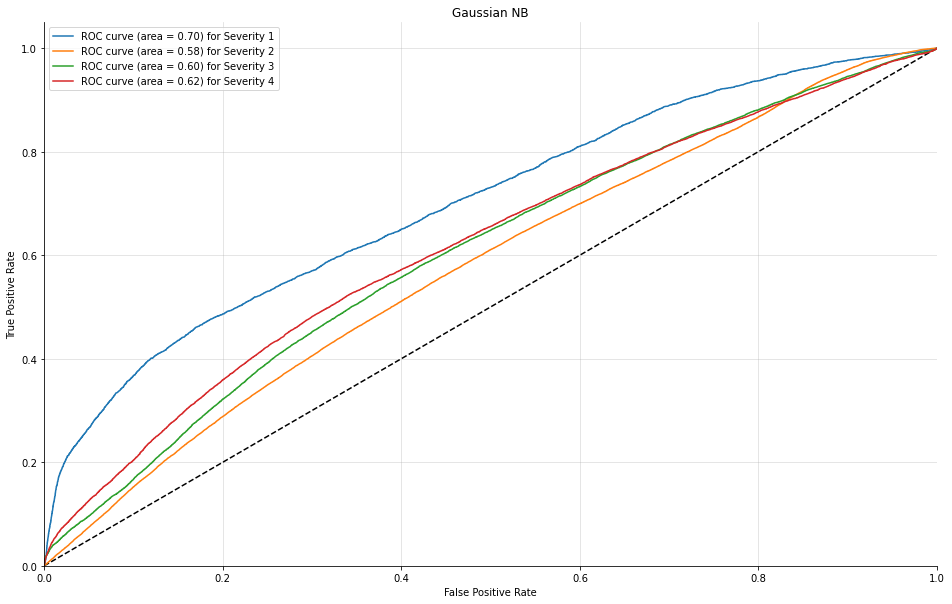

In [43]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Gaussian NB')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for Severity %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model, X_test, y_test, n_classes=4, figsize=(16, 10))



# Complement NB

In [44]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(X_train_scaled, y_train)
model

y_pred = model.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[   154   3461    217   1276]
 [ 32757 189422  16556 197208]
 [  1418   6285    881   7603]
 [  1454   4237    606   9193]]
Accuracy: 0.42233588871401734
Precision Score :  0.25662728984627836
Recall Score :  0.278141443958721
F1 Score :  0.1827257680499193


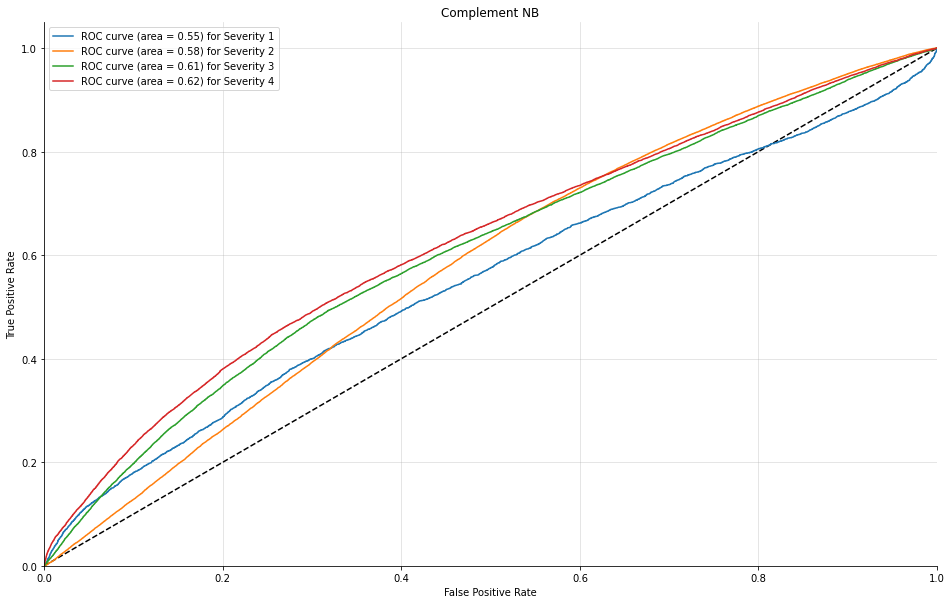

In [45]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Complement NB')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for Severity %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model, X_test, y_test, n_classes=4, figsize=(16, 10))

# Bernoulli NB

In [46]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
model

y_pred = model.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[     0   5108      0      0]
 [     0 435943      0      0]
 [     0  16187      0      0]
 [     0  15490      0      0]]
Accuracy: 0.9221856966373898
Precision Score :  0.23054642415934745
Recall Score :  0.25
F1 Score :  0.23987945031810193


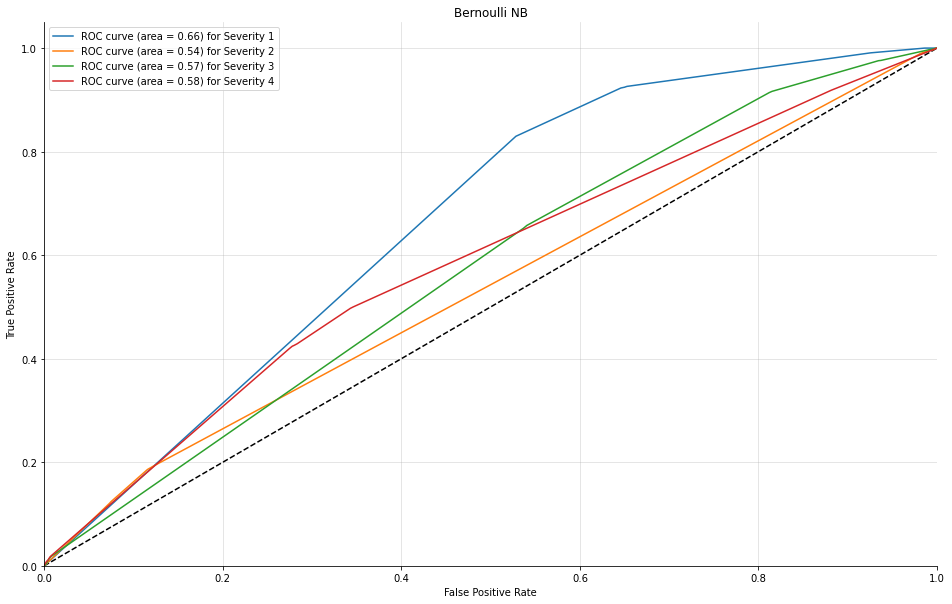

In [47]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Bernoulli NB')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for Severity %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model, X_test, y_test, n_classes=4, figsize=(16, 10))

[0.9221001 0.9221001 0.9221001 ... 0.9221001 0.9221001 0.9221001]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


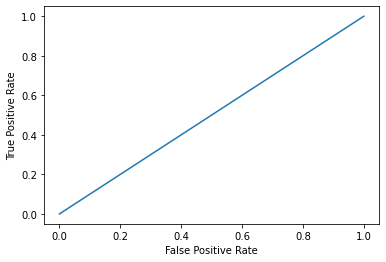

In [230]:
#define metrics
y_pred_probaCat = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaCat)
y_testCat = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testCat)

#y_pred_proba2 = 
fprCat, tprCat, thresholdsCat = metrics.roc_curve(y_testCat.argmax(axis=1),  y_pred_probaCat, pos_label=0)

#create ROC curve
plt.plot(fprCat,tprCat)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprCat,tprCat))
plt.show()

# Clustering

In [33]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [34]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
nosev = data.filter(['Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
nosev

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...
2845337,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [38]:
nosev = nosev.dropna()
nosev = nosev.reset_index(drop = True)
nosev

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...
2363634,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [39]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(nosev)
X

array([[0.37294118, 0.3279476 , 0.57575758, ..., 0.30915126, 0.07142857,
        0.57575758],
       [0.34823529, 0.30567686, 0.92929293, ..., 0.3074917 , 0.07142857,
        0.92929293],
       [0.34588235, 0.29956332, 1.        , ..., 0.30678046, 0.07142857,
        1.        ],
       ...,
       [0.51764706, 0.4628821 , 0.63636364, ..., 0.3086771 , 0.07142857,
        0.63636364],
       [0.50980392, 0.45414847, 0.80808081, ..., 0.30583215, 0.07142857,
        0.80808081],
       [0.54117647, 0.48908297, 0.46464646, ..., 0.28236131, 0.05      ,
        0.46464646]])

In [40]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [41]:
centroids = kmeans.cluster_centers_
centroids

array([[0.48550463, 0.43166789, 0.48379104, 0.00752631, 0.00427792,
        0.3019515 , 0.07078466, 0.48379104],
       [0.4293147 , 0.37235041, 0.89019572, 0.00539686, 0.00498266,
        0.30127958, 0.05358477, 0.89019572],
       [0.5197646 , 0.46658404, 0.24320996, 0.00754597, 0.00422689,
        0.28696085, 0.07088333, 0.24320996],
       [0.4632598 , 0.40843534, 0.68633388, 0.00679169, 0.00430452,
        0.3043778 , 0.06912387, 0.68633388]])

In [43]:
targets = df2.Severity - 1
targets

0          2
1          2
2          1
3          1
4          1
          ..
2363634    1
2363635    1
2363636    1
2363637    1
2363638    1
Name: Severity, Length: 2363639, dtype: int64

In [45]:
y_kmeans = kmeans.fit_predict(X)

# Cross Tabulation of Targets and Predictions

In [46]:
pd.crosstab(targets+1,y_kmeans+1)

col_0,1,2,3,4
Severity,,,,
1,5863,5165,9431,5080
2,532027,710834,299581,637274
3,21765,25786,10787,22598
4,17940,29723,7685,22100


# Elbow Method

In [47]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(nosev)
    distortions.append(kmeanModel.inertia_)

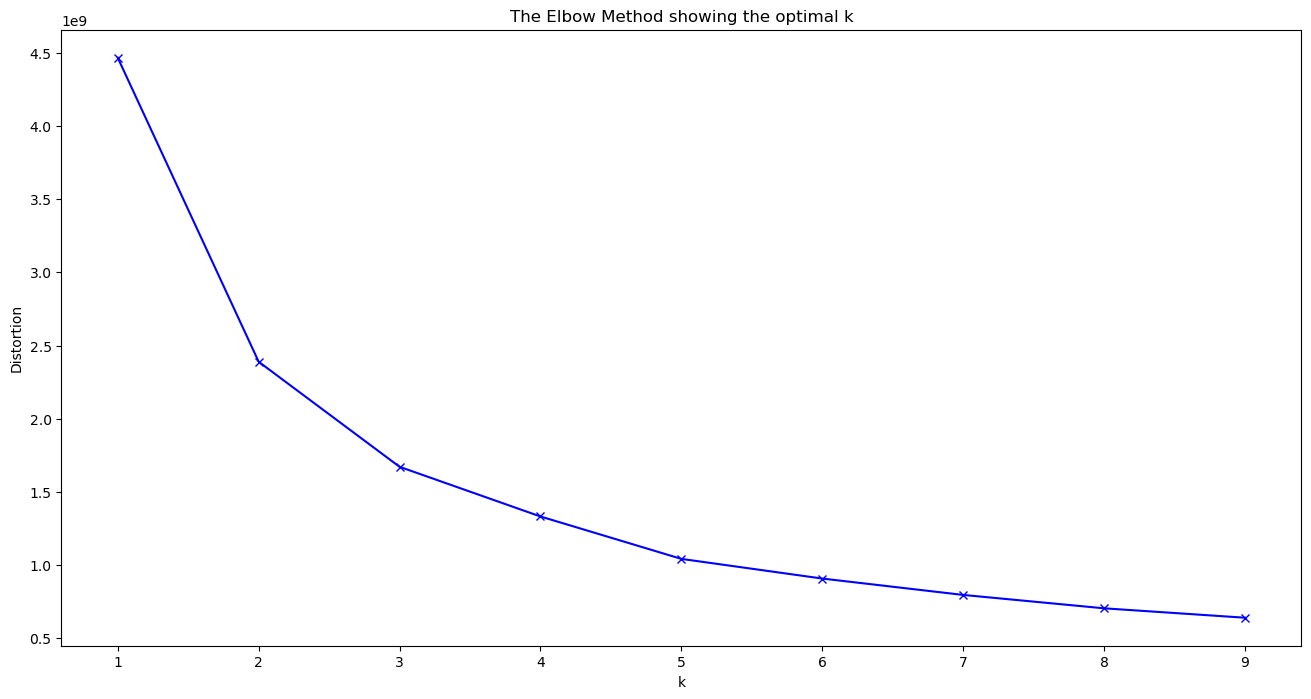

In [49]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
#This was done by group member Madiha
clusteredData = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)'])
clusteredData

clusteredData = clusteredData.dropna()
clusteredData = clusteredData.reset_index(drop = True)
clusteredData

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0
...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0


In [51]:
clusteredData.columns

Index(['Severity', 'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler
features = ['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)']
X = clusteredData.loc[:, features].values
Y = clusteredData.loc[:,['Severity']].values
X = StandardScaler().fit_transform(clusteredData)
X

array([[ 2.22138286, -1.11564661, -0.9942085 , ...,  1.64184932,
         0.33949754,  0.35784692],
       [ 2.22138286, -1.41359873, -1.26276198, ..., -0.12956221,
         0.27541369,  0.35784692],
       [-0.21693739, -1.44197512, -1.33648255, ...,  0.47193907,
         0.24794919,  0.35784692],
       ...,
       [-0.21693739,  0.62950149,  0.6329097 , ..., -0.08998122,
         0.32118787,  0.35784692],
       [-0.21693739,  0.53491352,  0.5275946 , ...,  0.04693007,
         0.21132985,  0.35784692],
       [-0.21693739,  0.91326541,  0.94885498, ..., -0.10555407,
        -0.69499884, -0.78205547]])

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.306075,1.537926
1,-2.127294,0.552767
2,-2.160760,-0.108196
3,-3.198490,-1.429813
4,-1.363346,0.612497
...,...,...
2363634,2.163400,0.763710
2363635,0.559631,-0.448473
2363636,0.972900,-0.157814
2363637,0.507107,-0.529263


In [61]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans = kmeans.fit_predict(principalDf)

In [62]:
kmeans.cluster_centers_

array([[-1.79800462, -0.63780324],
       [ 1.63499968,  0.36071467],
       [ 0.17012319, -0.53690781],
       [-1.64106581,  1.77312258]])

In [63]:
X_new = np.array([[1,3],[-10,2]])
kmeans.predict(X_new)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 3])

In [64]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


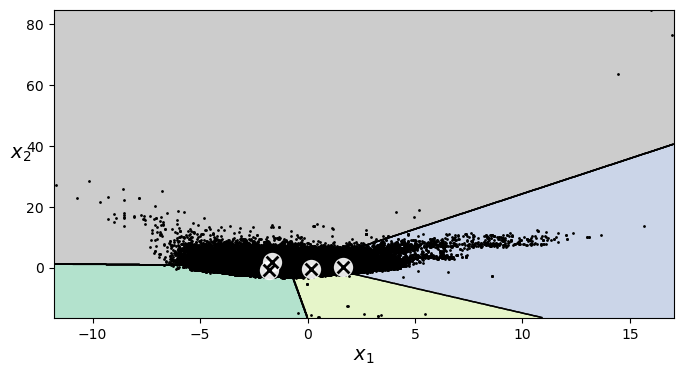

In [65]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, principalDf)
plt.show()

In [66]:
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(principalDf)
kmeans_iter2.fit(principalDf)
kmeans_iter3.fit(principalDf)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


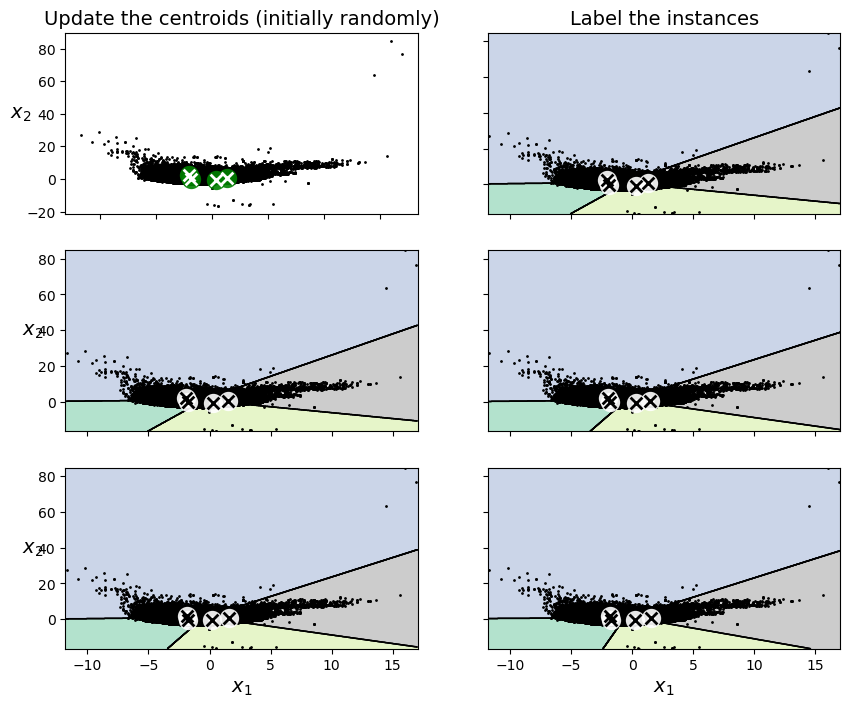

In [67]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(principalDf)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='g', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, principalDf, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, principalDf, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, principalDf, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, principalDf, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, principalDf, show_ylabels=False)

plt.show()

In [68]:
def plot_clusterer_comparison(clusterer1, clusterer2, principalDf, title1=None, title2=None):
    clusterer1.fit(principalDf)
    clusterer2.fit(principalDf)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, principalDf)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, principalDf, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


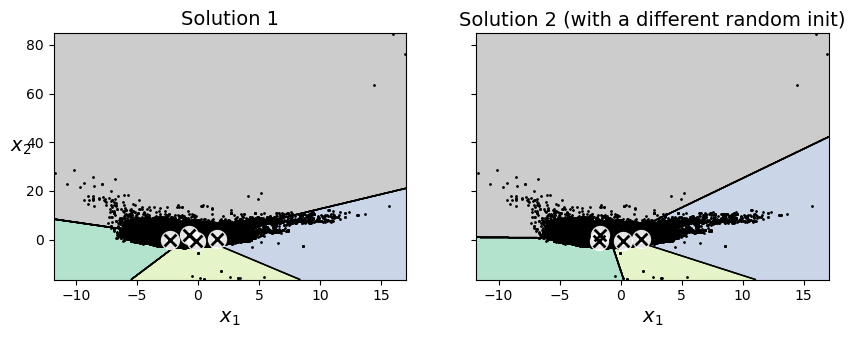

In [69]:
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=70)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, principalDf,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

In [72]:
print("Intertia:", kmeans.inertia_)
print("Score:", kmeans.score(principalDf))

Intertia: 2905493.3664747374
Score: -2905493.3664747374


In [71]:
principalDf_dist = kmeans.transform(principalDf)
np.sum(principalDf_dist[np.arange(len(principalDf_dist)), kmeans.labels_]**2)

2905493.3664747314

In [73]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(principalDf)

KMeans(algorithm='full', init='random', n_clusters=4, random_state=11)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


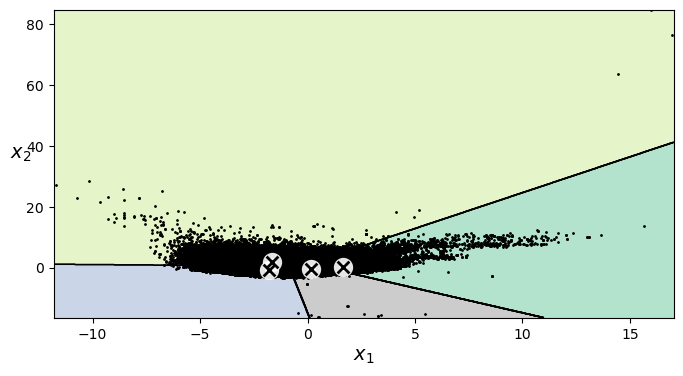

In [74]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, principalDf)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


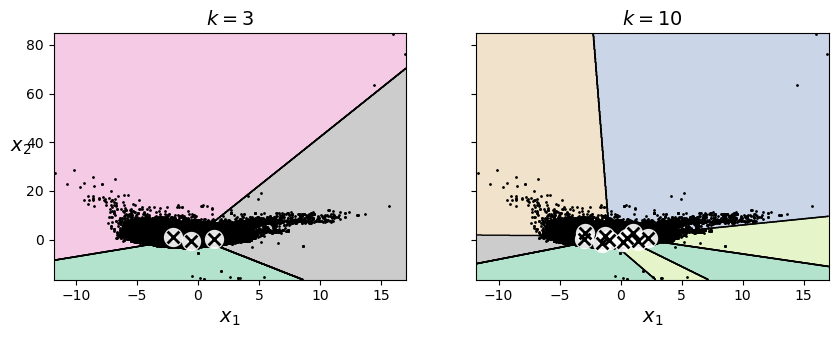

In [75]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, principalDf, "$k=3$", "$k=10$")
plt.show()

In [76]:
kmeans_k3.inertia_

3592656.8082498647

In [77]:
kmeans_k8.inertia_

1336085.8664476788

# Decision Trees

In [78]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [9]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]
#df2_upsample = resample(spam_messages,
#             replace=True,
#             n_samples=len(ham_messages),
#             random_state=42)

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)


(25539, 9)
(2179716, 9)
(80936, 9)
(77448, 9)


Downsample the data so we have equal amounts of data for each severity

<AxesSubplot:ylabel='Type'>

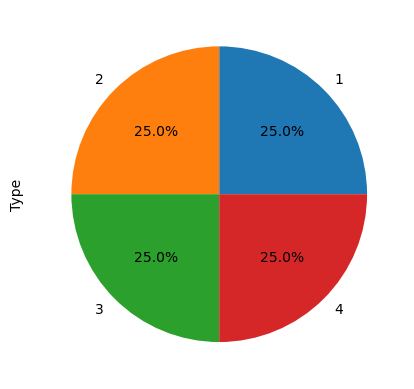

In [10]:
sev2_downsample = resample(sev2,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev3_downsample = resample(sev3,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev4_downsample = resample(sev4,
             replace=True,
             n_samples=len(sev1),
             random_state=42)

pdList = [sev1,sev2_downsample,sev3_downsample,sev4_downsample]
df2_downsampled = pd.concat(pdList)
df2_downsampled.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')

# TREE 1

In [91]:
X = df2_downsampled.iloc[:, 1:].values.round(decimals=0)
y = df2_downsampled.iloc[:, 0].values

In [93]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

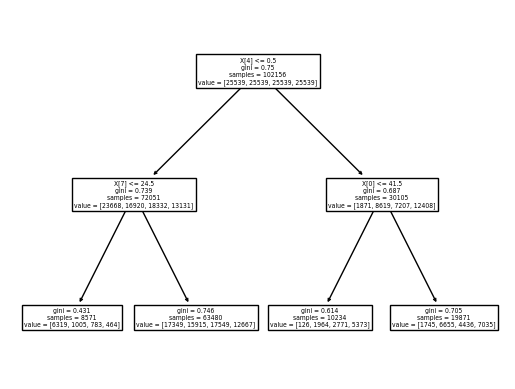

In [94]:
plot_tree(tree_clf);

In [95]:
var_train, var_test, res_train, res_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state= 42)

In [96]:
decision_tree = DecisionTreeClassifier(max_depth=8, random_state=42)
decision_tree = decision_tree.fit(var_train, res_train)

In [97]:
#using the macro average would be a good choice as it treats all classes equally.
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


res_pred = decision_tree.predict(var_test)
acc = accuracy_score(res_test, res_pred)
rec = recall_score(res_test, res_pred, average='macro')
pre = precision_score(res_test, res_pred, average='macro')
f1 = f1_score(res_test, res_pred, average='macro')

print(confusion_matrix(res_test, res_pred))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

[[3283  929  720  176]
 [1309 2016  864  919]
 [ 831 1049 2355  873]
 [ 680 1351 1283 1794]]
Accuracy: 0.4624119028974158
Precision Score :  0.46073943371093457
Recall Score :  0.46241190289741585
F1 Score :  0.45796612140630677


# TREE 2

In [98]:
newSizeX = round(0.3 * res_train.size)
newSizey = round(0.3 * res_train.size)

newSizey

24517

In [99]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)


(25539, 9)
(2179716, 9)
(80936, 9)
(77448, 9)


In [100]:
sev1_2 = resample(sev1,
             replace=True,
             n_samples=7661,
             random_state=42)
sev2_2 = resample(sev2,
             replace=True,
             n_samples=7661,
             random_state=42)
sev3_2 = resample(sev3,
             replace=True,
             n_samples=7661,
             random_state=42)
sev4_2 = resample(sev4,
             replace=True,
             n_samples=7661,
             random_state=42)

<AxesSubplot:ylabel='Type'>

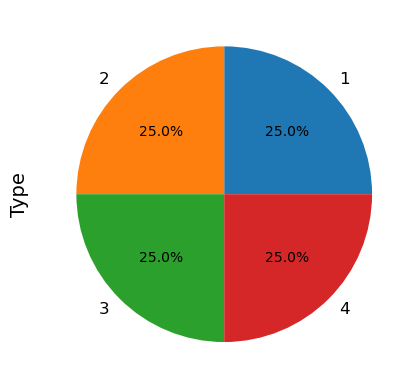

In [101]:
pdList = [sev1_2,sev2_2,sev3_2,sev4_2]
df2_tree2 = pd.concat(pdList)
df2_tree2.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [102]:
X = df2_tree2.iloc[:, 1:].values.round(decimals=0)
y = df2_tree2.iloc[:, 0].values

In [103]:
var_train1, var_test1, res_train1, res_test1 = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
decision_tree2 = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree2 = decision_tree.fit(var_train1, res_train1)

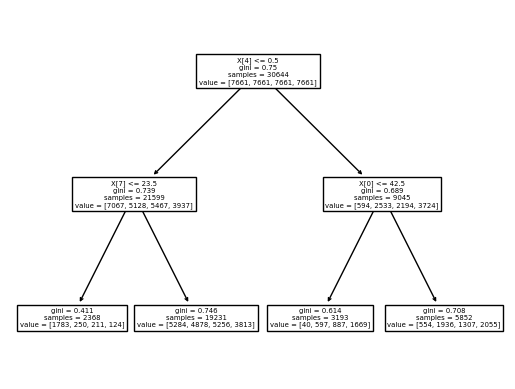

In [105]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [106]:
res_pred1 = decision_tree2.predict(var_test1)
acc = accuracy_score(res_test1, res_pred1)
rec = recall_score(res_test1, res_pred1, average='macro')
pre = precision_score(res_test1, res_pred1, average='macro')
f1 = f1_score(res_test1, res_pred1, average='macro')

print(confusion_matrix(res_test1, res_pred1))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

[[1336  521  327  102]
 [ 538 1034  351  437]
 [ 357  511  935  434]
 [ 311  639  531  830]]
Accuracy: 0.44974983685011966
Precision Score :  0.4510675294420038
Recall Score :  0.44992122958857794
F1 Score :  0.4480184769151777


# TREE 3

In [107]:
sev1_3 = resample(sev1,
             replace=True,
             n_samples=17877,
             random_state=42)
sev2_3 = resample(sev2,
             replace=True,
             n_samples=17877,
             random_state=42)
sev3_3 = resample(sev3,
             replace=True,
             n_samples=17877,
             random_state=42)
sev4_3 = resample(sev4,
             replace=True,
             n_samples=17877,
             random_state=42)

<AxesSubplot:ylabel='Type'>

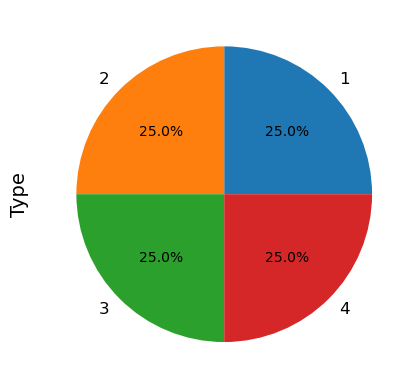

In [108]:
pdList = [sev1_3,sev2_3,sev3_3,sev4_3]
df2_tree3 = pd.concat(pdList)
df2_tree3.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [109]:
X = df2_tree3.iloc[:, 1:].values.round(decimals=0)
y = df2_tree3.iloc[:, 0].values

In [110]:
var_train2, var_test2, res_train2, res_test2 = train_test_split(X, y, test_size = 0.3)

In [115]:
decision_tree3 = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree3 = decision_tree.fit(var_train2, res_train2)

In [111]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

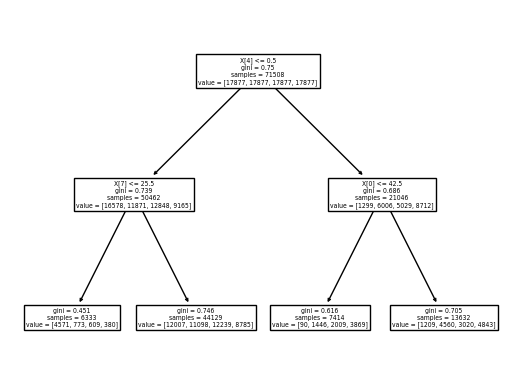

In [112]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [116]:
res_pred2 = decision_tree3.predict(var_test2)
acc = accuracy_score(res_test2, res_pred2)
rec = recall_score(res_test2, res_pred2, average='macro')
pre = precision_score(res_test2, res_pred2, average='macro')
f1 = f1_score(res_test2, res_pred2, average='macro')


print(confusion_matrix(res_test2, res_pred2))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

[[3177 1253  785  137]
 [1147 2411  877  970]
 [ 778 1229 2419  932]
 [ 613 1615 1276 1834]]
Accuracy: 0.4587237216240153
Precision Score :  0.4628665162596406
Recall Score :  0.45868178094671536
F1 Score :  0.457160829866663


# Linear Regression

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [118]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.0672516296820365,
 array([-0.05419846,  0.04788672,  0.00359043, -0.00637376,  0.06359213,
         0.00398385,  0.01898508,  0.00359043]))

In [119]:
X_new = np.array([[0], [1], [2], [3], [4], [5], [6], [7]]) 
X_new_b = np.c_[np.ones((8, 1)), X_new]  # add x0 = 1 to each instance

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [121]:
model = LinearRegression()

In [122]:
model.fit(X_train,y_train)

LinearRegression()

In [123]:
predictions = model.predict(X_test)

In [126]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.0826190414003156
mean_absolute_error :  0.8985046645499195


In [127]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.0672516296820365,
 array([-0.05419846,  0.04788672,  0.00359043, -0.00637376,  0.06359213,
         0.00398385,  0.01898508,  0.00359043]))

# Linear Regression Gradient Descent

In [128]:
m,n = X.shape

In [130]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma

In [131]:
xo = np.hstack((np.ones((m, 1)), xn))

In [132]:
repeat = 1000
lrate = 0.1
theta = np.zeros((n+1))
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

In [133]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

In [134]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [ 2.50000000e+00 -5.10537957e-01  2.36867137e-01  8.08046988e-02
  4.55095374e-04  1.47150422e-01  9.58950743e-03  5.30924748e-02
  8.08046988e-02] 


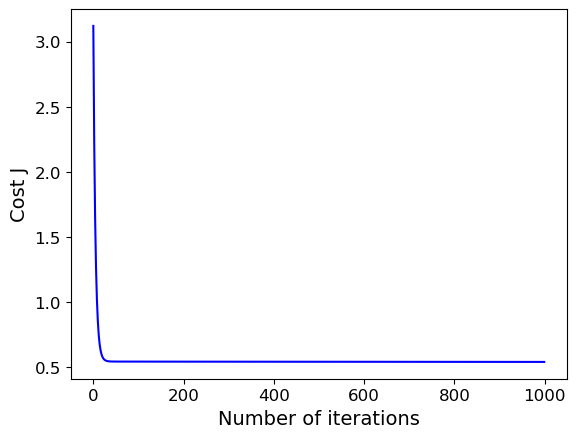

In [135]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [136]:
y_pred = np.matmul(xo, theta)

In [137]:
from sklearn import metrics
# get RMSE error rate
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))
# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

RMSE:  1.040590614806359
Mean of results:  125.80852473627033
Deviation of results:  64.76196915279854
Results within 10% support/resistance:  12.834927560552664


# Prediction Accuracy graph

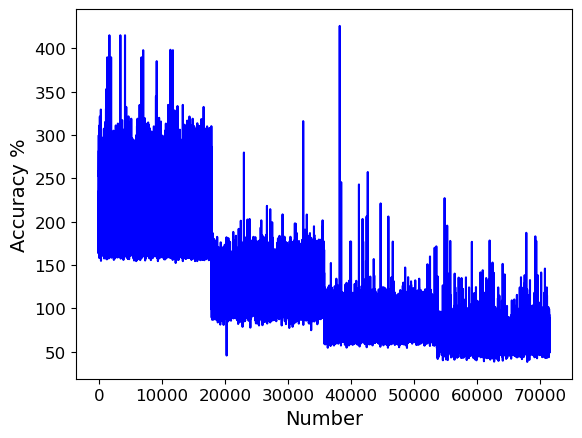

In [138]:
plt.plot(np.arange(m), diff, '-b')
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()

# Logistic Regression

In [139]:
testData1 = df2_downsampled.copy()

In [140]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [141]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
1493785,1,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1495315,1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
1507378,1,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
1509407,1,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
1510895,1,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
2001548,4,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
1874389,4,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
23230,4,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
14078,4,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [142]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [143]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,0,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,0,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,0,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,0,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
102151,0,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,0,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,0,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,0,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [144]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0].values
X

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...
102151,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [145]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


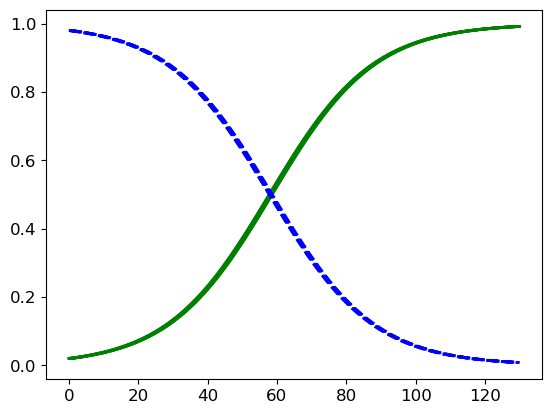

In [146]:
X_new = np.linspace(0, 130, 1000).reshape(-1, 8)
y_proba = log_reg.predict_proba(X_new) # estimated probability computed by the model, we use one feature (the petal width)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="2") # green curve plots estimated  Severity 2
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="0") # blue dotted line computes estimated probability of not Severity 2

In [147]:
df2_downsampled.corr()

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
Severity,1.000000,-0.316466,-0.310182,0.235975,-0.004451,0.176628,0.067009,-0.056118,0.235975
Wind_Chill(F),-0.316466,1.000000,0.994309,-0.416289,-0.032965,-0.111903,-0.064509,0.194803,-0.416289
Temperature(F),-0.310182,0.994309,1.000000,-0.439437,0.020307,-0.106371,-0.066411,0.192943,-0.439437
Humidity(%),0.235975,-0.416289,-0.439437,1.000000,-0.176241,0.075533,0.288547,-0.355523,1.000000
Wind_Speed(mph),-0.004451,-0.032965,0.020307,-0.176241,1.000000,0.012101,-0.044929,0.000427,-0.176241
Distance(mi),0.176628,-0.111903,-0.106371,0.075533,0.012101,1.000000,-0.024977,-0.050592,0.075533
Pressure(in),0.067009,-0.064509,-0.066411,0.288547,-0.044929,-0.024977,1.000000,-0.080606,0.288547
Visibility(mi),-0.056118,0.194803,0.192943,-0.355523,0.000427,-0.050592,-0.080606,1.000000,-0.355523
Humidity(%),0.235975,-0.416289,-0.439437,1.000000,-0.176241,0.075533,0.288547,-0.355523,1.000000


# Perceptron

In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import Perceptron
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [14]:
testData1 = df2_downsampled.copy()

In [15]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [16]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
1493785,1,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1495315,1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
1507378,1,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
1509407,1,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
1510895,1,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
2001548,4,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
1874389,4,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
23230,4,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
14078,4,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [17]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [18]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,0,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,0,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,0,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,0,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
102151,0,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,0,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,0,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,0,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [19]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0]
y

0         0
1         0
2         0
3         0
4         0
         ..
102151    0
102152    0
102153    0
102154    0
102155    0
Name: Severity, Length: 102156, dtype: int64

In [20]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

# Scores and Metrics

In [21]:
per_clf.score(X, y)

0.7412584674419516

In [158]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [159]:
cross_validation(Perceptron(max_iter=1000, tol=1e-3, random_state=42), X, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is i

{'Training Accuracy scores': array([0.36664129, 0.75      , 0.75009789, 0.38911246, 0.28840548,
        0.47942136, 0.74999184, 0.75008973, 0.75000272, 0.26344068]),
 'Mean Training Accuracy': 55.37203463944116,
 'Training Precision scores': array([0.26912697, 0.        , 0.62857143, 0.27356482, 0.25542019,
        0.2699088 , 0.        , 0.78571429, 0.        , 0.25160194]),
 'Mean Training Precision': 0.273390843604969,
 'Training Recall scores': array([8.93756798e-01, 0.00000000e+00, 9.57145965e-04, 8.72003481e-01,
        9.64107026e-01, 6.34805308e-01, 0.00000000e+00, 4.78572982e-04,
        0.00000000e+00, 9.85686317e-01]),
 'Mean Training Recall': 0.43517946486839243,
 'Training F1 scores': array([0.41368547, 0.        , 0.00191138, 0.4164736 , 0.40384896,
        0.37877057, 0.        , 0.00095656, 0.        , 0.40087763]),
 'Mean Training F1 Score': 0.20165241693963093,
 'Validation Accuracy scores': array([0.39712216, 0.75      , 0.75009789, 0.39800313, 0.30990603,
        0.

In [162]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score

df_reviews = pd.read_csv("US_Accidents_Dec21_updated.csv")
    
df_reviews.dropna(inplace=True) 
df_reviews.reset_index(drop=True, inplace=True)


model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................................ score: (test=0.256) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.253) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.254) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.261) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.744) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.255) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.757) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.447) total time=   0.0s
0.4744588901269533 0.23512025340284418


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


# Confusion Matrix

In [34]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [37]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix

In [38]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

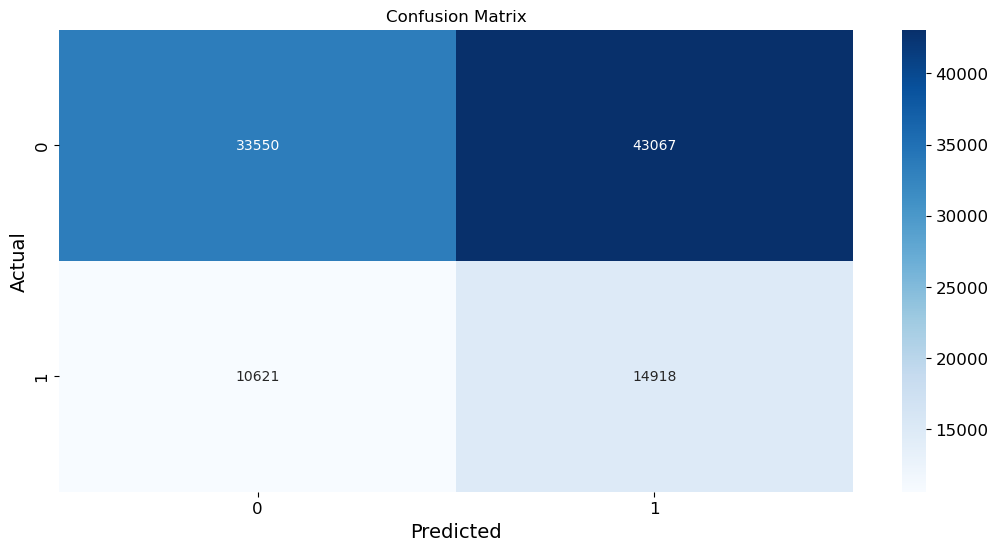

In [167]:
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

# Multi Layer Perceptron


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [25]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

In [27]:
clf = MLPClassifier(hidden_layer_sizes= 50, activation = 'tanh', random_state=1, max_iter=300).fit(X_train, y_train)

In [28]:
clf.predict_proba(X_test[:1])

array([[0.76823879, 0.23176121]])

In [29]:
y_pred = clf.predict(X_test)

In [30]:
clf.score(X_test, y_test)

0.7665139590430322

In [32]:
from sklearn.model_selection import cross_val_predict

In [40]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     19154
           1       0.56      0.31      0.40      6385

    accuracy                           0.77     25539
   macro avg       0.68      0.61      0.63     25539
weighted avg       0.74      0.77      0.74     25539



In [43]:
print(confusion_matrix(y_test, y_pred))

[[17605  1549]
 [ 4414  1971]]


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  0.2334860409569678
mean_absolute_error :  0.2334860409569678
